In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from wordcloud import WordCloud

In [4]:
# !pip install wordcloud


# Problem description
Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).

But, it’s not always clear whether a person’s words are actually announcing a disaster. Take this example:
    
In this competition, you’re challenged to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t. You’ll have access to a dataset of 10,000 tweets that were hand classified. If this is your first time working on an NLP problem, we've created a quick tutorial to get you up and running.

# Data Description

In [5]:
df = pd.read_csv("./data/train.csv")

In [6]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [29]:
df.shape

(7613, 6)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           7613 non-null   int64 
 1   keyword      7552 non-null   object
 2   location     5080 non-null   object
 3   text         7613 non-null   object
 4   target       7613 non-null   int64 
 5   text_length  7613 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 357.0+ KB


# EDA

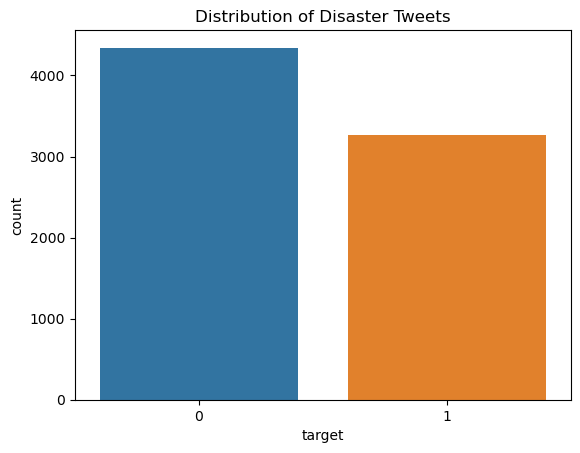

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


/var/folders/3k/vhmk7kx14ybb600l38fbqg780000gn/T/ipykernel_90414/4233257945.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['text_length'], kde=False, bins=50)


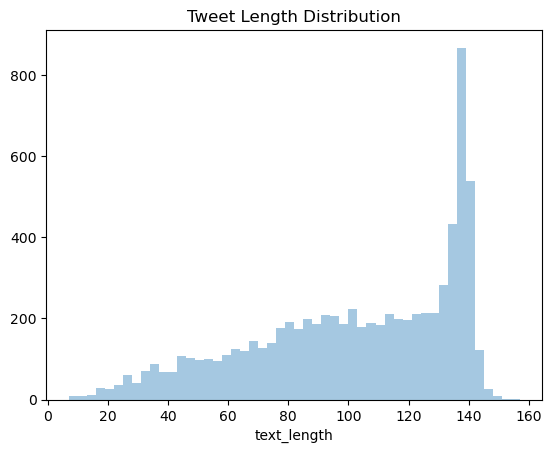

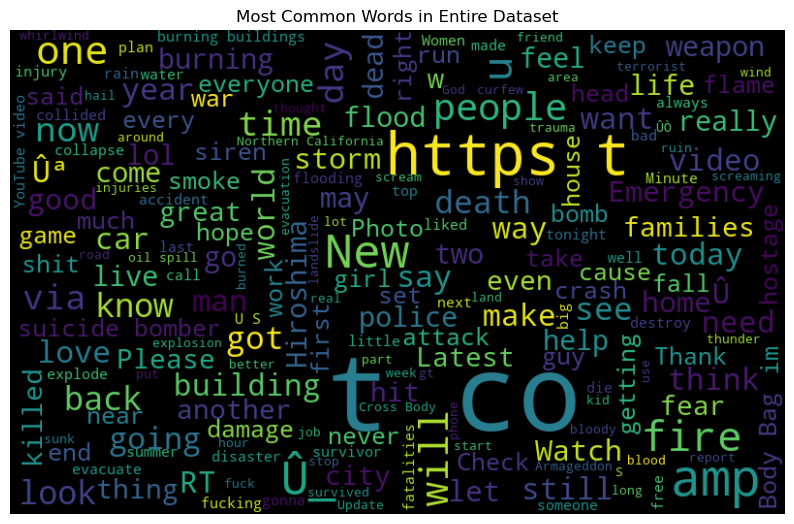

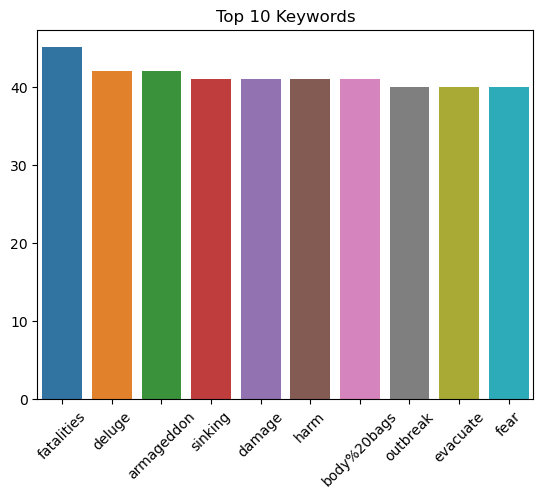

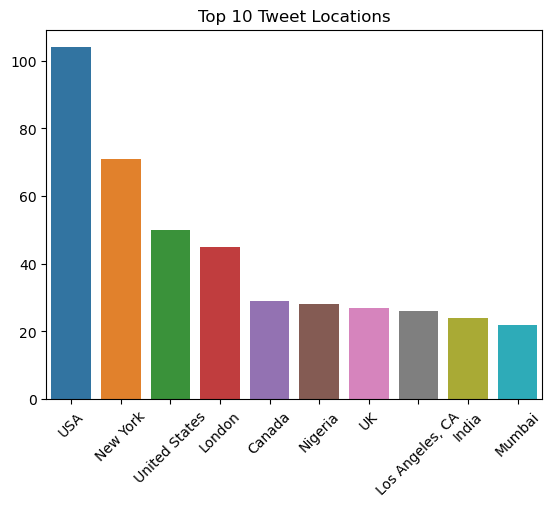

In [7]:
sns.countplot(x="target", data=df)
plt.title('Distribution of Disaster Tweets')
plt.show()

# 3. Missing Value Analysis
missing_values = df.isnull().sum()
print(missing_values)

# 4. Text Data Analysis
df['text_length'] = df['text'].apply(len)
sns.distplot(df['text_length'], kde=False, bins=50)
plt.title('Tweet Length Distribution')
plt.show()

# Most common words
all_words = ' '.join([text for text in df['text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Most Common Words in Entire Dataset')
plt.show()

# 5. Keyword and Location Analysis
top_keywords = df['keyword'].value_counts().head(10)
sns.barplot(x=top_keywords.index, y=top_keywords.values)
plt.title('Top 10 Keywords')
plt.xticks(rotation=45)
plt.show()

top_locations = df['location'].value_counts().head(10)
sns.barplot(x=top_locations.index, y=top_locations.values)
plt.title('Top 10 Tweet Locations')
plt.xticks(rotation=45)
plt.show()

In [8]:
df.keyword.value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [9]:
print(df.keyword.unique().tolist())

[nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident', 'ambulance', 'annihilated', 'annihilation', 'apocalypse', 'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked', 'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze', 'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood', 'bloody', 'blown%20up', 'body%20bag', 'body%20bagging', 'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse', 'buildings%20burning', 'buildings%20on%20fire', 'burned', 'burning', 'burning%20buildings', 'bush%20fires', 'casualties', 'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency', 'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided', 'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew', 'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris', 'deluge', 'deluged', 'demolish', 'demolished', 'demolition', 'derail', 'derailed', 'derailment', 'desolate', 'desolation', 'destroy', 'destroyed', 'destruction', 'detonate', 'deto

In [10]:
for col in df.columns:

    num_distinct_values = len(df[col].unique())
    print(f"{col}: {num_distinct_values} unique values")

id: 7613 unique values
keyword: 222 unique values
location: 3342 unique values
text: 7503 unique values
target: 2 unique values
text_length: 147 unique values


In [11]:
df.shape

(7613, 6)

In [12]:
df.describe()

,id,target,text_length
count,7613.000000,7613.00000,7613.000000
mean,5441.934848,0.42966,101.037436
std,3137.116090,0.49506,33.781325
min,1.000000,0.00000,7.000000
25%,2734.000000,0.00000,78.000000
50%,5408.000000,0.00000,107.000000
75%,8146.000000,1.00000,133.000000
max,10873.000000,1.00000,157.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           7613 non-null   int64 
 1   keyword      7552 non-null   object
 2   location     5080 non-null   object
 3   text         7613 non-null   object
 4   target       7613 non-null   int64 
 5   text_length  7613 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 357.0+ KB


In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
# import keras_core as keras
import keras
# import keras_nlp
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)
# print("KerasNLP version:", keras_nlp.__version__)

TensorFlow version: 2.13.0


In [15]:
df_train = pd.read_csv("./data/train.csv")
df_test = pd.read_csv("./data/test.csv")

In [16]:
BATCH_SIZE = 32
NUM_TRAINING_EXAMPLES = df_train.shape[0]
TRAIN_SPLIT = 0.8
VAL_SPLIT = 0.2
STEPS_PER_EPOCH = int(NUM_TRAINING_EXAMPLES)*TRAIN_SPLIT // BATCH_SIZE

EPOCHS = 2
AUTO = tf.data.experimental.AUTOTUNE

In [17]:
from sklearn.model_selection import train_test_split

X = df_train["text"]
y = df_train["target"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=VAL_SPLIT, random_state=42)

X_test = df_test["text"]

In [18]:
df

,id,keyword,location,text,target,text_length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137


In [19]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Constants
VOCAB_SIZE = 10000
MAX_LENGTH = 100
EMBEDDING_DIM = 16
TRUNC_TYPE = 'post'
PADDING_TYPE = 'post'
OOV_TOK = "<OOV>"

# 1. Preprocess the data

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOK)
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
padded_sequences = pad_sequences(sequences, maxlen=MAX_LENGTH, padding=PADDING_TYPE, truncating=TRUNC_TYPE)

# Train-test split
X = padded_sequences
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Build the LSTM model

model = Sequential([
    Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LENGTH),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# 3. Train the model

history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=32)

# 4. Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 lstm (LSTM)                 (None, 100, 64)           20736     
                                                                 
 dropout (Dropout)           (None, 100, 64)           0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 24)                792       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 193969 (757.69 KB)
Trainable params: 19396

In [20]:
test_sequences = tokenizer.texts_to_sequences(df_test['text'])
padded_test_sequences = pad_sequences(test_sequences, maxlen=MAX_LENGTH, padding=PADDING_TYPE, truncating=TRUNC_TYPE)

# Predict using the model
test_predictions = model.predict(padded_test_sequences)

# Convert predictions to binary labels
test_labels = [1 if pred > 0.5 else 0 for pred in test_predictions]

# Add predictions to the df_test dataframe
df_test['predicted_target'] = test_labels

102/102 [==============================] - 1s 8ms/step


In [21]:
df_test

,id,keyword,location,text,predicted_target
0,0,NaN,NaN,Just happened a terrible car crash,0
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",0
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",0
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,0
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,0
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,0
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,0
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,0
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,0


# Notes for model

* Might need to adjust hyperparameters like VOCAB_SIZE, MAX_LENGTH, and EMBEDDING_DIM based on the distribution and nature of your data.

* We use Embedding as the first layer which converts our word tokens (integers) into embeddings of a specific size.

* We've added a couple of LSTM layers. The first LSTM returns sequences which are fed to the second LSTM layer. This stack of LSTMs helps the network to learn patterns over sequences of words.

* The use of Dropout can help prevent overfitting.

* The final layer has a sigmoid activation function to classify the tweets into one of the two classes (real disaster or not).

* depending on the dataset's size and complexity, you might need to train for more epochs, adjust the architecture (more neurons, more layers), or do further preprocessing to achieve the best results.

In [22]:
df_sub = df_test.drop(columns=['text', 'location', 'keyword'])

In [23]:
df_sub

,id,predicted_target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


# Hyperparameter tuning

In [24]:
import itertools

# Hyperparameters to tune
EMBEDDING_DIMS = [16, 32]
LSTM_UNITS = [32, 64]
DROPOUT_RATES = [0.1, 0.2]

# Store best hyperparameters and their performance
best_val_acc = 0
best_hyperparameters = None

for emb_dim, lstm_unit, dropout_rate in itertools.product(EMBEDDING_DIMS, LSTM_UNITS, DROPOUT_RATES):
    
    # Define the model with current hyperparameters
    model = Sequential([
        Embedding(VOCAB_SIZE, emb_dim, input_length=MAX_LENGTH),
        LSTM(lstm_unit, return_sequences=True),
        Dropout(dropout_rate),
        LSTM(lstm_unit),
        Dense(24, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=32, verbose=0)
    
    # Get the validation accuracy for the last epoch
    val_acc = history.history['val_accuracy'][-1]
    
    # Update best hyperparameters if current model is better
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_hyperparameters = (emb_dim, lstm_unit, dropout_rate)
    
    # Print results for the current setting
    print(f"EMBEDDING_DIM: {emb_dim}, LSTM_UNITS: {lstm_unit}, DROPOUT_RATE: {dropout_rate}, VAL_ACCURACY: {val_acc:.4f}")

# Display best hyperparameters
print("\nBest Hyperparameters:")
print(f"EMBEDDING_DIM: {best_hyperparameters[0]}, LSTM_UNITS: {best_hyperparameters[1]}, DROPOUT_RATE: {best_hyperparameters[2]}, BEST_VAL_ACCURACY: {best_val_acc:.4f}")

EMBEDDING_DIM: 16, LSTM_UNITS: 32, DROPOUT_RATE: 0.1, VAL_ACCURACY: 0.5739
EMBEDDING_DIM: 16, LSTM_UNITS: 32, DROPOUT_RATE: 0.2, VAL_ACCURACY: 0.5739
EMBEDDING_DIM: 16, LSTM_UNITS: 64, DROPOUT_RATE: 0.1, VAL_ACCURACY: 0.5739
EMBEDDING_DIM: 16, LSTM_UNITS: 64, DROPOUT_RATE: 0.2, VAL_ACCURACY: 0.5739
EMBEDDING_DIM: 32, LSTM_UNITS: 32, DROPOUT_RATE: 0.1, VAL_ACCURACY: 0.5739
EMBEDDING_DIM: 32, LSTM_UNITS: 32, DROPOUT_RATE: 0.2, VAL_ACCURACY: 0.5739
EMBEDDING_DIM: 32, LSTM_UNITS: 64, DROPOUT_RATE: 0.1, VAL_ACCURACY: 0.5739
EMBEDDING_DIM: 32, LSTM_UNITS: 64, DROPOUT_RATE: 0.2, VAL_ACCURACY: 0.5739

Best Hyperparameters:
EMBEDDING_DIM: 16, LSTM_UNITS: 32, DROPOUT_RATE: 0.1, BEST_VAL_ACCURACY: 0.5739


In [28]:
# import numpy as np
# from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming `model` is already defined and trained and `X_test` and `y_test` are already defined

# # Get the model's probability predictions
# y_probs = model.predict(X_test)

# # Convert probabilities to binary labels based on 0.5 threshold
# y_pred = [1 if i > 0.5 else 0 for i in y_probs]

# # 1. Confusion Matrix
# matrix = confusion_matrix(y_test, y_pred)
# sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

# # 2. ROC Curve
# fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# roc_auc = auc(fpr, tpr)

# plt.figure()
# lw = 2
# plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.show()

# Preparing submission

In [26]:
df_sub2 = df_sub.rename({'predicted_target': 'target'}, axis='columns')
df_sub3 = df_sub2.set_index('id')

In [27]:
df_sub3.to_csv('submission1.csv')